### 복습
1. drinks.csv 파일 로드
2. 결측치를 확인
3. 결측치 데이터를 'OT 대체
4. 컬럼의 이름을 변경 -> ['국가', '맥주소비량', '위스키소비량','와인소비량','도수','대륙']
5. 대륙별 맥주 소비량의 평균, 최소, 최대, 합계 출력
6. 도수 컬럼의 전체의 평균보다 대륙별 도수의 평균이 높은 대륙 출력

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
drinks = pd.read_csv('../../../csv/drinks.csv')

In [59]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [60]:
drinks.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [61]:
# 23개의 결측치만 뽑아보겠다.
# 인덱스 자리에 조건식을 넣어줌

flag = drinks['continent'].isna()

drinks.loc[flag, ]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,NaN
11,Bahamas,122,176,51,6.3,NaN
14,Barbados,143,173,36,6.3,NaN
17,Belize,263,114,8,6.8,NaN
32,Canada,240,122,100,8.2,NaN
41,Costa Rica,149,87,11,4.4,NaN
43,Cuba,93,137,5,4.2,NaN
50,Dominica,52,286,26,6.6,NaN
51,Dominican Republic,193,147,9,6.2,NaN
54,El Salvador,52,69,2,2.2,NaN


결측치 확인하기

In [62]:
## 결측치가 포함된 데이터프레임을 확인

#drinks.isna().any() # true가 1개라도 있는 데이터를 알려줌.
                    # 컬럼의 기준으로 보고 싶으면 생략 또는 axis=0 
flag2 = drinks.isna().any(axis=1)   # 인덱스를 기준으로 보고 싶은 경우
drinks.loc[~(flag2), ]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


결측치 채우기

In [63]:
## 결측치 데이터를 'OT'로 대체
## fillna('채울값')

drinks['continent'] = drinks['continent'].fillna('OT')

In [64]:
drinks.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [65]:
## 컬럼의 이름을 변경
drinks.columns = ['국가','맥주소비량','위스키소비량','와인소비량','도수','대륙']

In [66]:
drinks.head(1)

,국가,맥주소비량,위스키소비량,와인소비량,도수,대륙
0,Afghanistan,0,0,0,0.0,AS


In [67]:
group_data = drinks[ ['맥주소비량', '대륙']].groupby('대륙').agg(['mean','min','max','sum'])

In [68]:
# 또다른 방법
drinks[ ['맥주소비량', '대륙']].groupby('대륙').describe()

맥주소비량                                                           
   count        mean        std   min     25%    50%     75%    max
대륙                                                                 
AF  53.0   61.471698  80.557816   0.0   15.00   32.0   76.00  376.0
AS  44.0   37.045455  49.469725   0.0    4.25   17.5   60.50  247.0
EU  45.0  193.777778  99.631569   0.0  127.00  219.0  270.00  361.0
OC  16.0   89.687500  96.641412   0.0   21.00   52.5  125.75  306.0
OT  23.0  145.434783  79.621163   1.0   80.00  143.0  198.00  285.0
SA  12.0  175.083333  65.242845  93.0  129.50  162.5  198.00  333.0

In [69]:
# 맥주소비량의 평균만 뽑고 싶을때

group_data['맥주소비량']['mean']

대륙
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
OT    145.434783
SA    175.083333
Name: mean, dtype: float64

In [70]:
## 전체 데이터에서 도수의 평균
mean_data = drinks['도수'].mean()

In [71]:
# 대륙별 도수의 평균
group_data2 = drinks[['대륙', '도수']].groupby('대륙').mean()

In [72]:
flag3 = group_data2['도수'] > mean_data

In [73]:
group_data2.loc[flag3, ]

,도수
대륙,
EU,8.617778
OT,5.995652
SA,6.308333


In [74]:
## 과연 우리나라의 총 술소비량은 몇위인가?
## 그래프 표시
## 총 술소비량이 가장 많은 국가는 어디인가?

# 총 술소비량 컬럼 생성
# 맥주소비량 + 위스키소비량 + 와인소비량 = 총술소비량

In [75]:
drinks['총술소비량'] = drinks['맥주소비량'] + drinks['위스키소비량'] + drinks['와인소비량']

drinks.head(3)

,국가,맥주소비량,위스키소비량,와인소비량,도수,대륙,총술소비량
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39


In [76]:
## 총 술소비량을 기준으로 내림차순 정렬
drinks.sort_values('총술소비량', ascending=False, inplace=True)

In [77]:
## 인덱스 초기화
drinks.reset_index(drop=True, inplace=True)

In [78]:
drinks

,국가,맥주소비량,위스키소비량,와인소비량,도수,대륙,총술소비량
0,Andorra,245,138,312,12.4,EU,695
1,Grenada,199,438,28,11.9,OT,665
2,Czech Republic,361,170,134,11.8,EU,665
3,France,127,151,370,11.8,EU,648
4,Russian Federation,247,326,73,11.5,AS,646
...,...,...,...,...,...,...,...
188,Kuwait,0,0,0,0.0,AS,0
189,San Marino,0,0,0,0.0,EU,0
190,Iran,0,0,0,0.0,AS,0
191,Somalia,0,0,0,0.0,AF,0


In [79]:
# 우리나라의 순위
flag = drinks['국가'] == 'South Korea'
drinks.loc[flag].index[0]+1

99

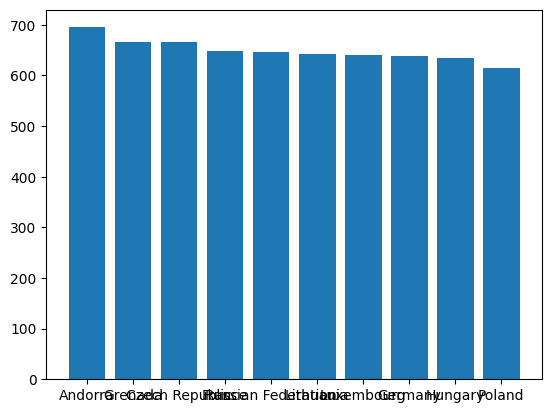

In [84]:
# 총술소비량이 상위 10위까지 데이터를 시각회
x = drinks['국가'].head(10)
y = drinks['총술소비량'].head(10)

plt.bar(x, y)
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


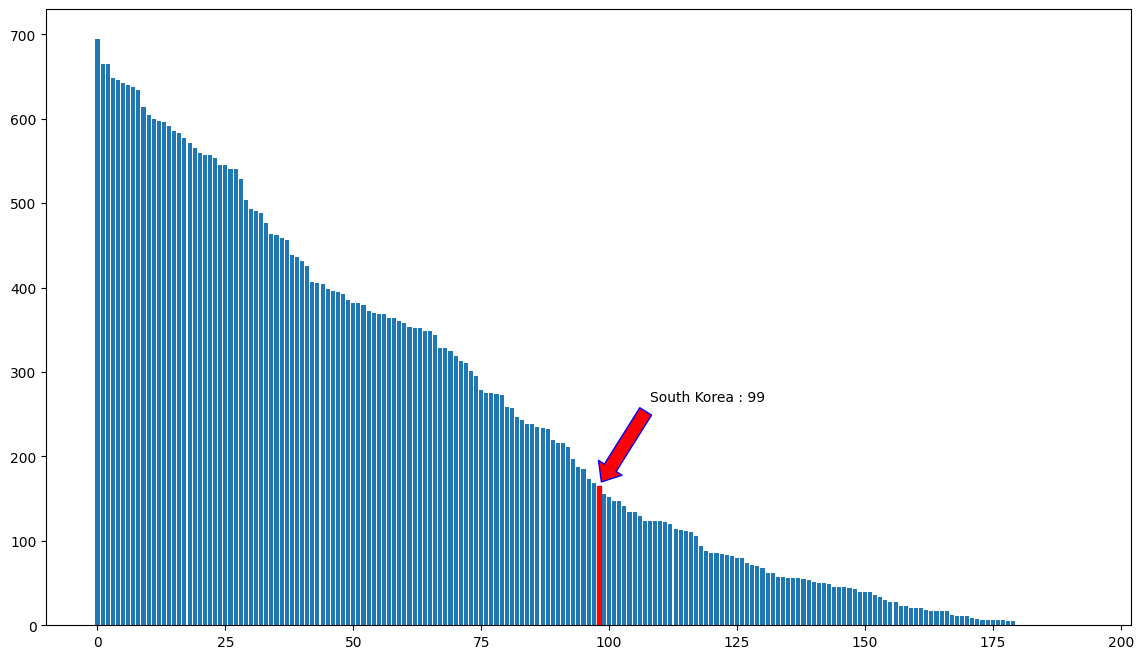

In [94]:
## 총술소비량을 막대 그래프 표시
## 우리나라의 막대 색상을 변경하고 주석 달기

x = drinks.index
y = drinks['총술소비량']

# south korea의 인덱스 값을 추출
korea_index = drinks.loc[ drinks['국가'] == 'South Korea'].index[0]

# south korea의 총술소비량 추출
korea_total = drinks.loc[
    drinks['국가']=='South Korea', '총술소비량'
    ]

# 그래프 사이즈 변경
plt.figure(figsize=(14, 8))

bar_list = plt.bar(x, y)

# 한국의 막대를 다른 색으로 변경
bar_list[korea_index].set_color('red')


# 그래프에 주석 설정
plt.annotate(
    f'South Korea : {korea_index + 1}',
    xy = (korea_index, korea_total),
    xytext = (korea_index+10, korea_total+100),
    arrowprops = dict(
        facecolor = 'r', # 화살표 내부의 색을 지정
        edgecolor = 'b', # 화살표 외각의 선 색을 지정
        headwidth = 20,  # 화살표 머리의 너비
        width = 10, # 화살표 꼬리의 너비
        shrink = 0.05 # 화살표와 주석 사이의 거리
    )
)
plt.show()

